# Group *Code Warriors v7.0* Project

## Poblog Based Agent 

### Starting the Game in Background


In [2]:
import subprocess
import pathlib
import os
from threading import Thread, Event
import select
import sys

# Kill any existing processes
!kill -9 $(ps aux | grep '.*compile_run_linux.*' | awk '{print $2}')
!kill -9 $(ps aux | grep 'java.*Main.*--pyftg-mode.*' | awk '{print $2}')

TIMEOUT = 5
current_dir = os.getcwd()

# Change to the DareFightingICE_CODE directory
os.chdir(pathlib.Path(current_dir).parent.absolute() / 'DareFightingICE_CODE')
print(f"Current directory: {os.getcwd()}")

stop_event = Event()

def capture_output(process):
    """Capture both stdout and stderr from the process"""
    while not stop_event.is_set() and process.poll() is None:
        # Monitor both stdout and stderr
        reads = [process.stdout.fileno(), process.stderr.fileno()]
        ret = select.select(reads, [], [], TIMEOUT)[0]
        
        if not ret:
            print(f"No output received in {TIMEOUT} seconds")
            continue
            
        for fd in ret:
            if fd == process.stdout.fileno():
                output = process.stdout.readline()
                if output:
                    print("STDOUT:", output.strip().decode())
            if fd == process.stderr.fileno():
                output = process.stderr.readline()
                if output:
                    print("STDERR:", output.strip().decode())
    
    return process.poll()

try:
    # Run compile_run_linux.sh with both streams captured
    process = subprocess.Popen(
        ['./compile_run_linux.sh'],
        stdout=subprocess.PIPE,
        stderr=subprocess.PIPE,
        universal_newlines=False  # Binary mode
    )
    
    print(f"Started background process with PID: {process.pid}")
    
    # Start output capture thread
    output_thread = Thread(
        target=capture_output,
        args=(process,),
        daemon=True
    )
    output_thread.start()
    
    # Save PID
    with open(os.path.join(current_dir, 'game_process.pid'), 'w') as f:
        f.write(str(process.pid))
        
except Exception as e:
    print(f"Error: {e}", file=sys.stderr)
    if process and process.poll() is None:
        process.terminate()
finally:
    # Cleanup
    os.chdir(current_dir)

Current directory: /home/lesi-nedo/Desktop/master/first-year/first-semester/AIF/AIF-project-24-25-O/DareFightingICE_CODE
Started background process with PID: 449791


STDERR: Note: Some input files use or override a deprecated API.
STDERR: Note: Recompile with -Xlint:deprecation for details.
STDERR: Jan 10, 2025 1:54:18 PM manager.GraphicManager <init>
STDERR: INFO: Create instance: manager.GraphicManager
STDERR: Jan 10, 2025 1:54:18 PM loader.ResourceLoader <init>
STDERR: INFO: Create instance: loader.ResourceLoader
STDERR: Jan 10, 2025 1:54:18 PM core.Game initialize
STDERR: INFO: Socket server is started, listening on 31415
STDERR: Jan 10, 2025 1:54:18 PM gamescene.Socket initialize
STDERR: INFO: Waiting to launch a game
STDERR: Jan 10, 2025 1:54:18 PM manager.InputManager <init>
STDERR: INFO: Create instance: manager.InputManager
STDERR: Jan 10, 2025 1:54:22 PM service.SocketServer lambda$startServer$0
STDERR: INFO: Received run game request
STDERR: Jan 10, 2025 1:54:22 PM service.SocketServer lambda$startServer$0
STDERR: INFO: Client connected as Game Playing AI
STDERR: Jan 10, 2025 1:54:22 PM gamescene.Launcher update
STDERR: INFO: Transition 

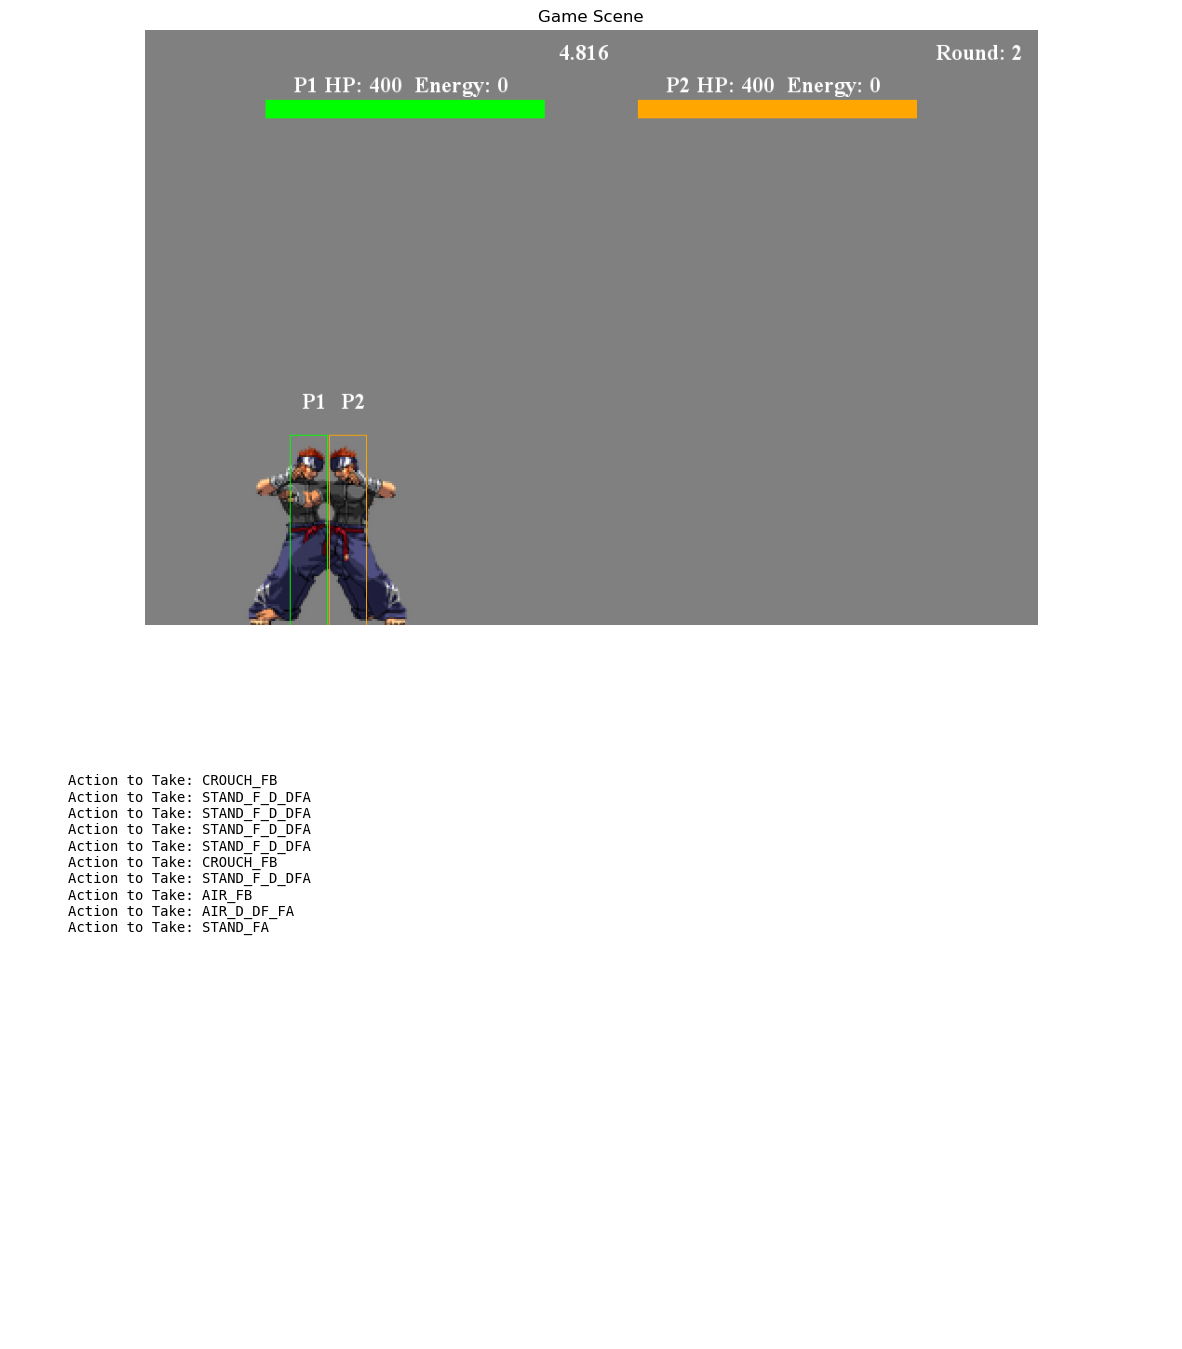

Statement: curr_hp_value(me,400)
Statement: curr_energy_value(me,0)
Statement: curr_hp_value(opponent,400)
Statement: curr_energy_value(opponent,0)
Statement: count_state(me,stand,0)
Statement: count_total_states(me,1)
Statement: count_state(opponent,stand,0)
Statement: count_total_states(opponent,1)
Statement: prev_hp_value(me,400)
Statement: prev_energy_value(me,0)
Statement: prev_hp_value(opponent,400)
Statement: prev_energy_value(opponent,0)
Statement: prev_action_type(me,movement)
Statement: prev_action_type(opponent,movement)
Statement: 0.9::curr_pos(me,720,537)
Statement: 0.9::curr_pos(opponent,240,537)
Statement: 0.9::facing_dir(me,-1)
Statement: 0.9::facing_dir(opponent,1)
Statement: 0.95::hbox(me,700,740,435,640)
Statement: 0.95::hbox(opponent,200,260,435,640)
Statement: curr_hp_value(me,400)
Statement: curr_energy_value(me,0)
Statement: curr_hp_value(opponent,400)
Statement: curr_energy_value(opponent,0)
Statement: count_state(me,stand,20)
Statement: count_total_states(me,26

In [3]:
%matplotlib inline
from pyftg import Key


import keyboard
import time
import os
import sys
import logging
import pathlib
logging.getLogger().setLevel(logging.WARNING)

current_dir = os.getcwd()

# Change to the DareFightingICE_CODE directory
os.chdir(pathlib.Path(current_dir).parent.absolute())
print(f"Current directory: {os.getcwd()}")

from prolog_based.problog_agent_ole.ProblogAgent import ProblogAgent
from prolog_based.problog_agent_ole.MainPAIvsHum import start_process



host='127.0.0.1'
port=31415

await start_process(host=host, port=port, plot_scenes=True)
os.chdir(current_dir)

In [ ]:
stop_event.set()
!kill -9 $(ps aux | grep '.*compile_run_linux.*' | awk '{print $2}')
!kill -9 $(ps aux | grep  'java.*Main.*--pyftg-mode.*' | awk '{print $2}')